In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv("termdeposit_train.csv")
test=pd.read_csv("termdeposit_test.csv")

In [5]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [6]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [9]:
train.shape

(31647, 18)

In [10]:
test.shape

(13564, 17)

In [11]:
#removing unwanted column ID
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [12]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [13]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [14]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


there is lot of outlier present ex. mean is grater than 50% , high gap between 75% and max data we have to treat it in further step

In [16]:
# Check null values in train data
train.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [17]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [18]:
# Check duplicates records for train data
train.duplicated().sum()

0

In [19]:
# Check duplicates records for test data
test.duplicated().sum()

0

# No duplicated and null values in both train & test data.

# Exploratory Data Analysis (EDA)

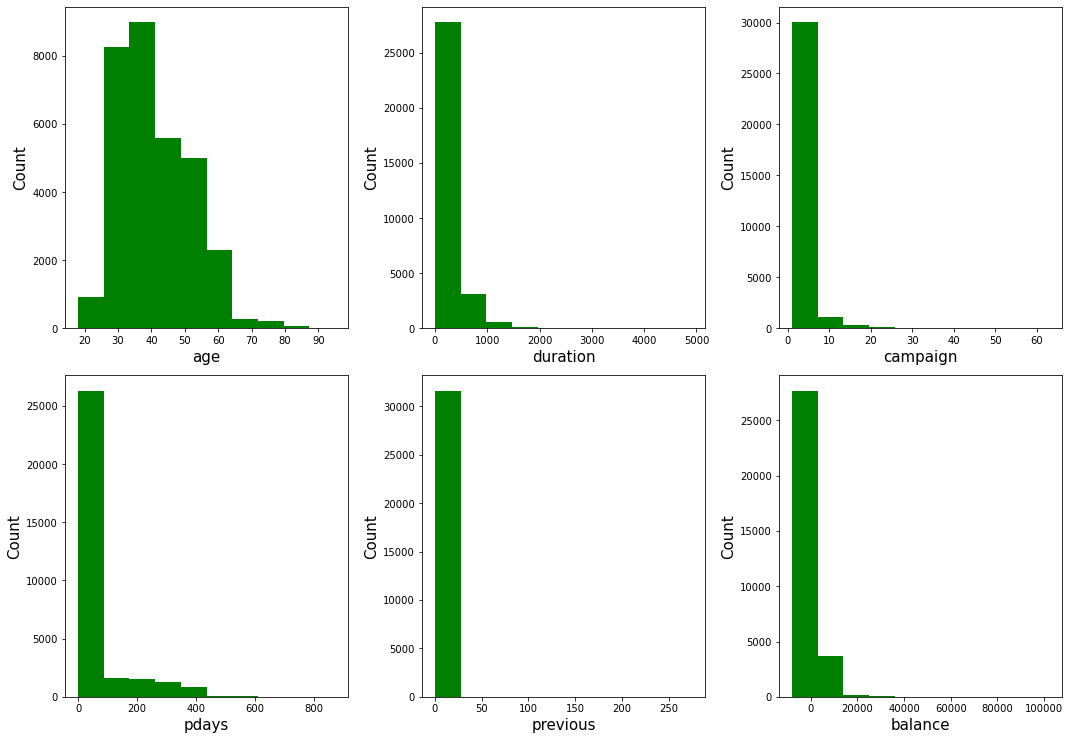

In [20]:
#univariant analysis of numerical features
data1=train[['age','duration','campaign','pdays','previous','balance','day']]
plt.figure(figsize=(15,15))
plotnumber=1
for columns in data1:
    if plotnumber<7:
        plt.subplot(3,3,plotnumber)
        plt.hist(data1[columns],color='green')
        plt.xlabel(columns,fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plotnumber+=1
plt.tight_layout()

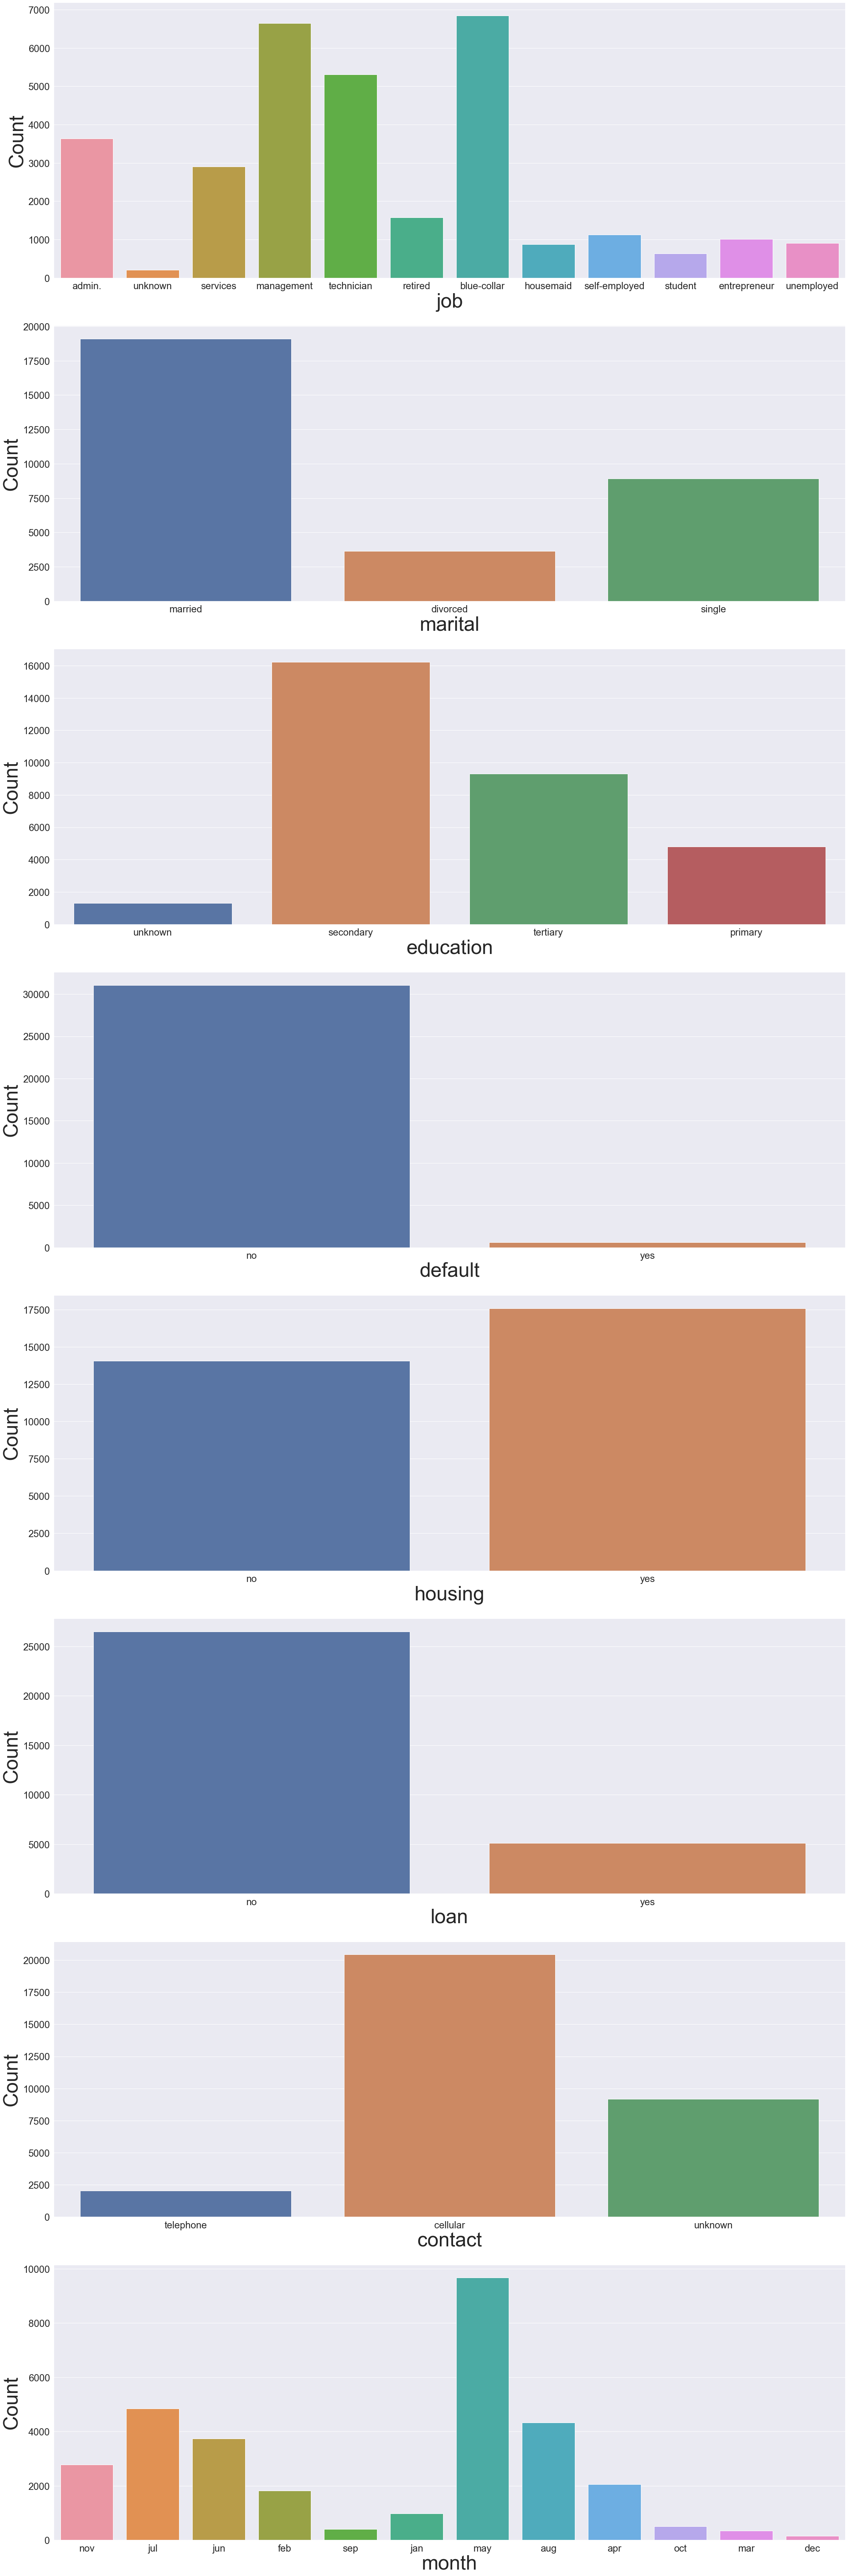

In [21]:
# Univariant analysis of catagorical features
sns.set(font_scale=2.2)
data1=train[['job','marital','education','default','housing','loan','contact','month','poutcome']]
plt.figure(figsize=(30,100))
plotnumber=1
for columns in data1:
    if plotnumber<9:
        plt.subplot(9,1,plotnumber)
        sns.countplot(data1[columns])
        plt.xlabel(columns,fontsize=50)
        plt.ylabel('Count',fontsize=50)
        plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='job', ylabel='count'>

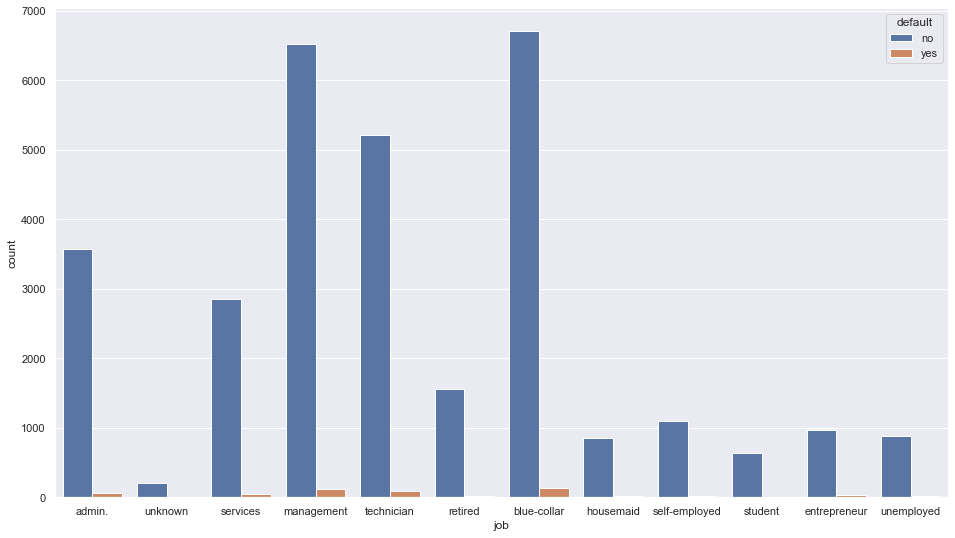

In [22]:
sns.set(font_scale=1)
plt.figure(figsize=(16,9))
sns.countplot(x=train.job,data=train,hue='default',saturation=0.75)

 no customer is defaulter in job profile

<AxesSubplot:xlabel='job', ylabel='count'>

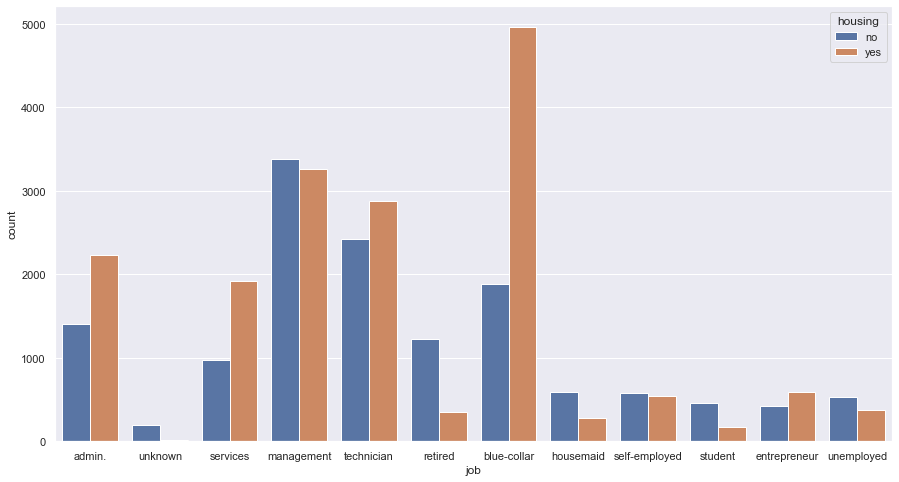

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x=train.job,data=train,hue='housing',saturation=0.75)

All the customers with different different job profile have taken housing loan, but mostly the customers having job profile
of admin,technician and blue-collar,management have taken loan for housing.

<AxesSubplot:xlabel='age', ylabel='Count'>

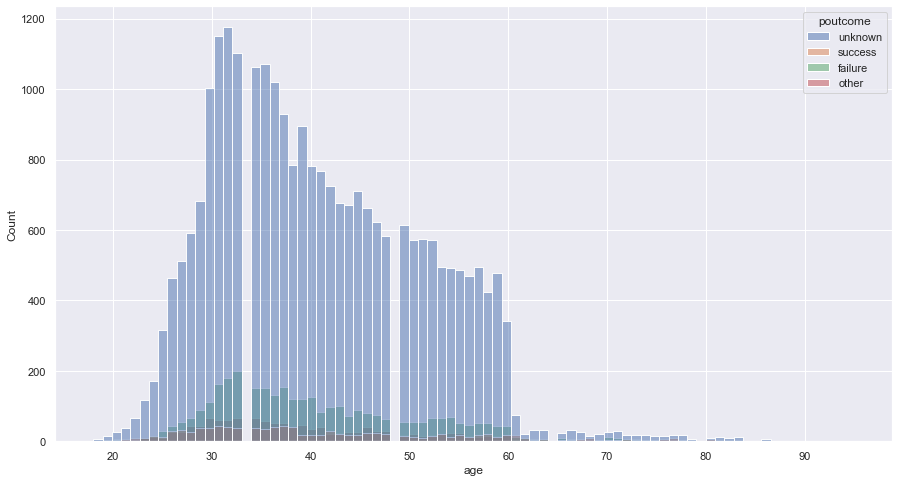

In [24]:
plt.figure(figsize=(15,8))
sns.histplot(x=train.age,data=train,hue='poutcome',color='purple')

The customers of age group 25 to 50 are more likely to get our product

<AxesSubplot:xlabel='month', ylabel='count'>

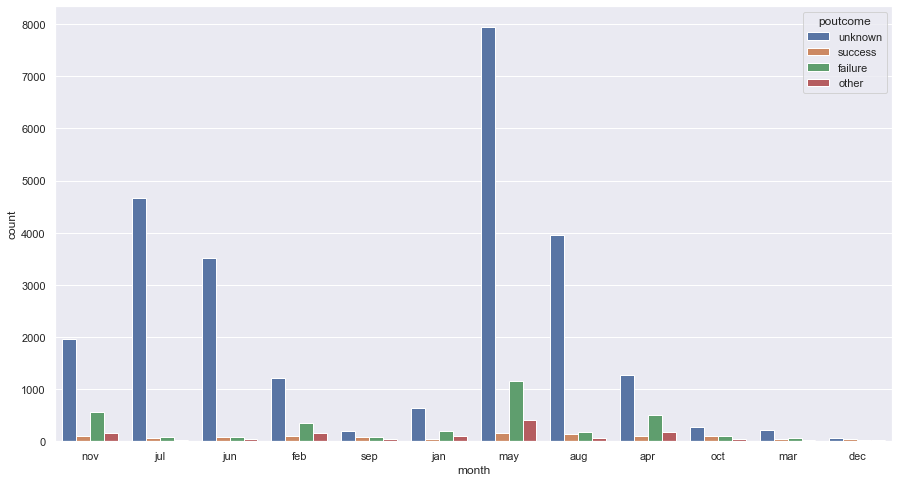

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(train.month,data=train,hue='poutcome')

The customers which were contacted in the month of may, August,June and july have taken our product more, as comapred to the
customers which were contacted in different month

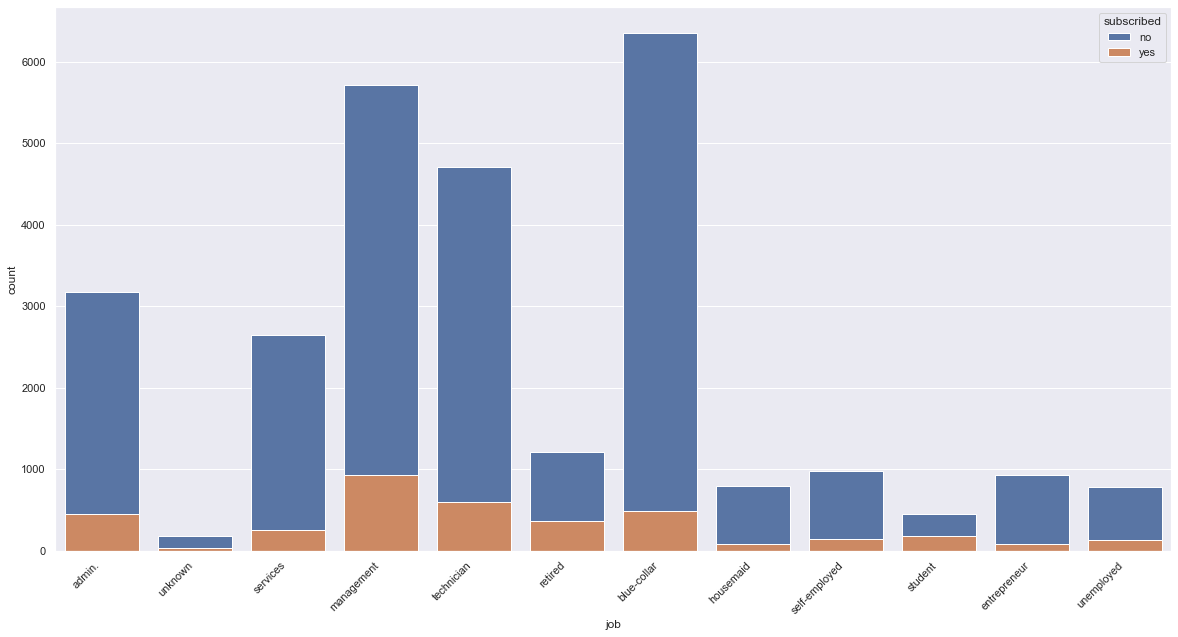

In [26]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'job', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

On the basis of above observation, we can say that management,blue collor  and technician have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit.

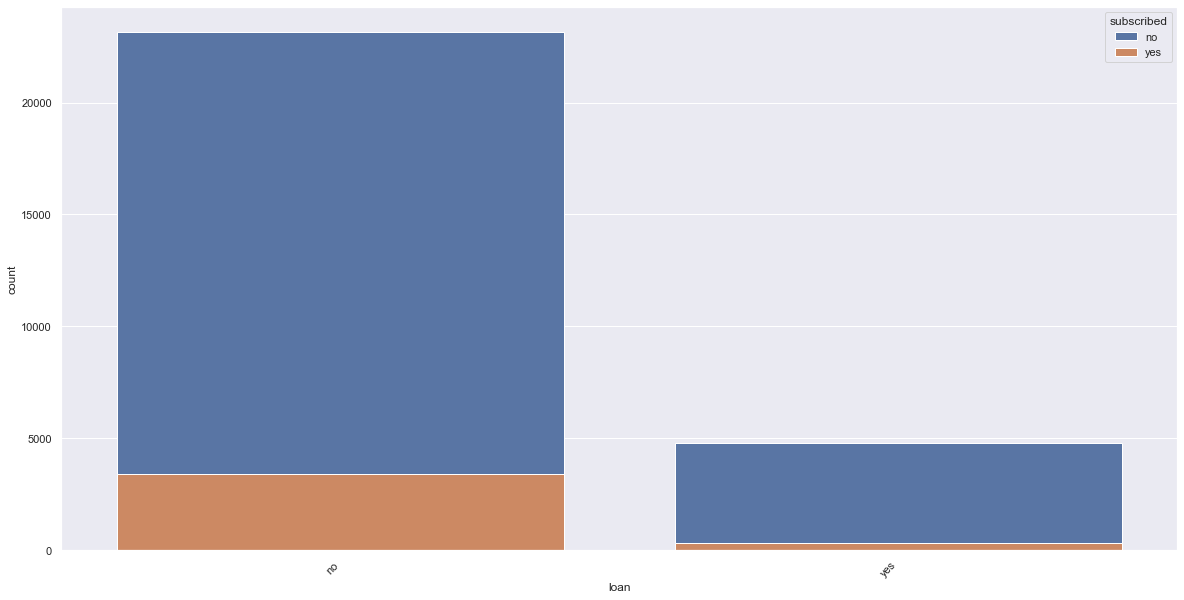

In [27]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'loan', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

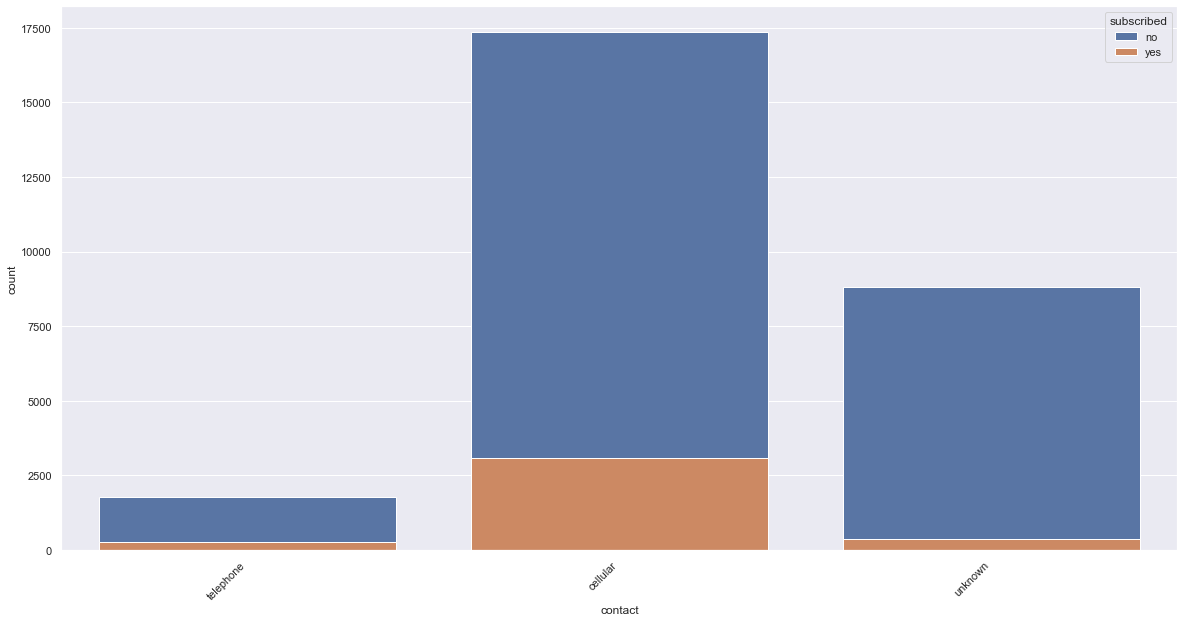

In [28]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'contact', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

In [29]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

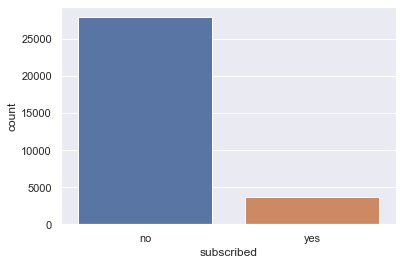

In [30]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

our target variable is imbalanced we will fix it later

# Encoding

In [31]:
print(train['subscribed'].value_counts())

no     27932
yes     3715
Name: subscribed, dtype: int64


In [32]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [33]:
print(train['poutcome'].value_counts())

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


In [34]:
train['poutcome'].replace('unknown', 0,inplace=True)
train['poutcome'].replace('failure', 1,inplace=True)
train['poutcome'].replace('other', 2,inplace=True)
train['poutcome'].replace('success', 3,inplace=True)

In [35]:
print(train['month'].value_counts())

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


In [36]:
train['month'].replace('jan', 1,inplace=True)
train['month'].replace('feb', 2,inplace=True)
train['month'].replace('mar', 3,inplace=True)
train['month'].replace('apr', 4,inplace=True)
train['month'].replace('may', 5,inplace=True)
train['month'].replace('jun', 6,inplace=True)
train['month'].replace('jul', 7,inplace=True)
train['month'].replace('aug', 8,inplace=True)
train['month'].replace('sep', 9,inplace=True)
train['month'].replace('oct', 10,inplace=True)
train['month'].replace('nov', 11,inplace=True)
train['month'].replace('dec', 12,inplace=True)

In [37]:
print(train['contact'].value_counts())

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


In [38]:
train['contact'].replace('cellular', 0,inplace=True)
train['contact'].replace('unknown', 1,inplace=True)
train['contact'].replace('telephone', 2,inplace=True)

In [39]:
print(train['education'].value_counts())

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


In [40]:
train['education'].replace('unknown', 0,inplace=True)
train['education'].replace('primary', 1,inplace=True)
train['education'].replace('secondary', 2,inplace=True)
train['education'].replace('tertiary', 3,inplace=True)

In [41]:
print(train['job'].value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


In [42]:
train['job'].replace('unknown', 0,inplace=True)
train['job'].replace('student', 1,inplace=True)
train['job'].replace('housemaid', 2,inplace=True)
train['job'].replace('unemployed', 3,inplace=True)
train['job'].replace('entrepreneur', 4,inplace=True)
train['job'].replace('self-employed', 5,inplace=True)
train['job'].replace('retired', 6,inplace=True)
train['job'].replace('services', 7,inplace=True)
train['job'].replace('admin.', 8,inplace=True)
train['job'].replace('technician', 9,inplace=True)
train['job'].replace('management', 10,inplace=True)
train['job'].replace('blue-collar', 11,inplace=True)

In [43]:
print(train['housing'].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


In [44]:
train['housing'].replace('no', 0,inplace=True)
train['housing'].replace('yes', 1,inplace=True)

In [45]:
print(train['loan'].value_counts())

no     26516
yes     5131
Name: loan, dtype: int64


In [46]:
train['loan'].replace('no', 0,inplace=True)
train['loan'].replace('yes', 1,inplace=True)

In [47]:
print(train['default'].value_counts())

no     31062
yes      585
Name: default, dtype: int64


In [48]:
train['default'].replace('no', 0,inplace=True)
train['default'].replace('yes', 1,inplace=True)

In [49]:
print(train['marital'].value_counts())

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


In [50]:
train['marital'].replace('divorced', 0,inplace=True)
train['marital'].replace('single', 1,inplace=True)
train['marital'].replace('married', 2,inplace=True)

In [51]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,8,2,0,0,1933,0,0,2,19,11,44,2,-1,0,0,0
1,31,0,2,2,0,3,0,0,0,20,7,91,2,-1,0,0,0
2,27,7,2,2,0,891,1,0,0,18,7,240,1,-1,0,0,0
3,57,10,0,3,0,3287,0,0,0,22,6,867,1,84,3,3,1
4,31,9,2,2,0,119,1,0,0,4,2,380,1,-1,0,0,0


In [92]:
#encoding on test data

test['poutcome'].replace('unknown', 0,inplace=True)
test['poutcome'].replace('failure', 1,inplace=True)
test['poutcome'].replace('other', 2,inplace=True)
test['poutcome'].replace('success', 3,inplace=True)

In [93]:
test['month'].replace('jan', 1,inplace=True)
test['month'].replace('feb', 2,inplace=True)
test['month'].replace('mar', 3,inplace=True)
test['month'].replace('apr', 4,inplace=True)
test['month'].replace('may', 5,inplace=True)
test['month'].replace('jun', 6,inplace=True)
test['month'].replace('jul', 7,inplace=True)
test['month'].replace('aug', 8,inplace=True)
test['month'].replace('sep', 9,inplace=True)
test['month'].replace('oct', 10,inplace=True)
test['month'].replace('nov', 11,inplace=True)
test['month'].replace('dec', 12,inplace=True)

In [94]:
test['contact'].replace('cellular', 0,inplace=True)
test['contact'].replace('unknown', 1,inplace=True)
test['contact'].replace('telephone', 2,inplace=True)

In [95]:
test['education'].replace('unknown', 0,inplace=True)
test['education'].replace('primary', 1,inplace=True)
test['education'].replace('secondary', 2,inplace=True)
test['education'].replace('tertiary', 3,inplace=True)

In [96]:
test['job'].replace('unknown', 0,inplace=True)
test['job'].replace('student', 1,inplace=True)
test['job'].replace('housemaid', 2,inplace=True)
test['job'].replace('unemployed', 3,inplace=True)
test['job'].replace('entrepreneur', 4,inplace=True)
test['job'].replace('self-employed', 5,inplace=True)
test['job'].replace('retired', 6,inplace=True)
test['job'].replace('services', 7,inplace=True)
test['job'].replace('admin.', 8,inplace=True)
test['job'].replace('technician', 9,inplace=True)
test['job'].replace('management', 10,inplace=True)
test['job'].replace('blue-collar', 11,inplace=True)

In [97]:
test['housing'].replace('no', 0,inplace=True)
test['housing'].replace('yes', 1,inplace=True)

In [98]:
test['loan'].replace('no', 0,inplace=True)
test['loan'].replace('yes', 1,inplace=True)

In [119]:
test['default'].replace('no', 0,inplace=True)
test['default'].replace('yes', 1,inplace=True)

In [100]:
test['marital'].replace('divorced', 0,inplace=True)
test['marital'].replace('single', 1,inplace=True)
test['marital'].replace('married', 2,inplace=True)

In [102]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,2,2,no,118,1,0,0,15,5,20,6,-1,0,0
1,78,6,0,1,no,2787,0,0,2,1,7,372,1,-1,0,0
2,31,5,1,3,no,144,1,0,1,16,5,676,1,-1,0,0
3,57,7,1,1,no,3777,1,0,2,13,5,65,2,-1,0,0
4,45,11,0,2,no,-705,0,1,1,3,7,111,1,-1,0,0


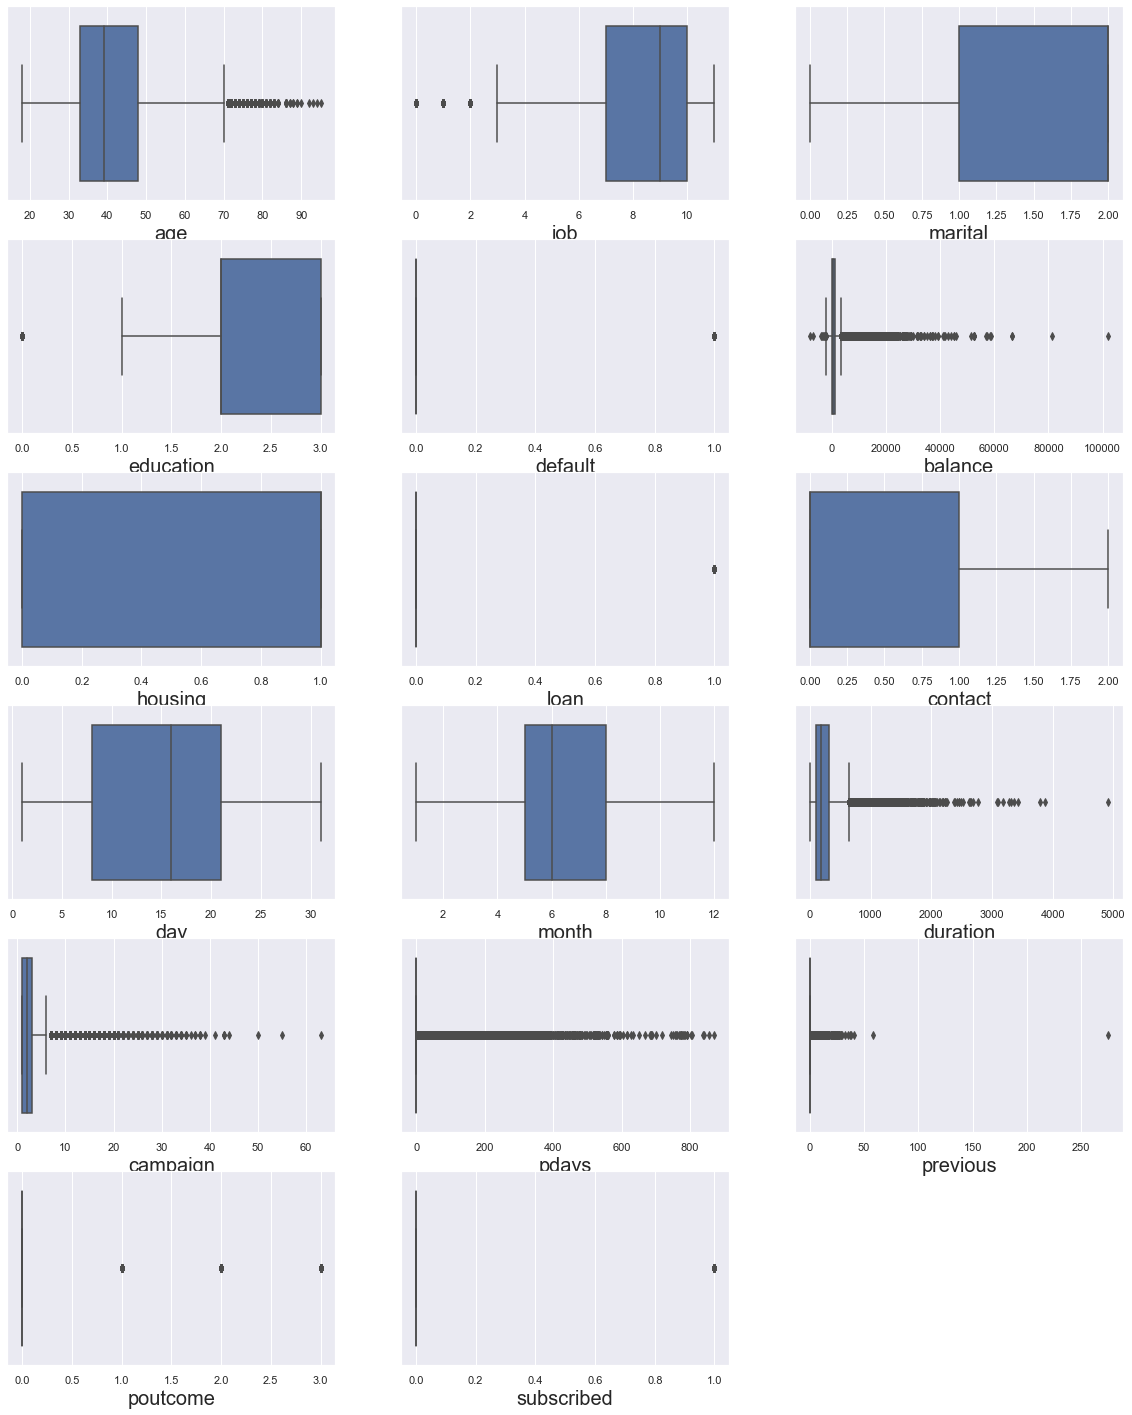

In [52]:
# Checking for outliers
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train:
    if plotnumber<=17 :
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(train[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

we can see for Age,Duration,campaign,Pdays,balance,previous we have outliers.

In [53]:
from scipy import stats
z = np.abs(stats.zscore(train[['age','job','balance','duration','campaign','pdays','previous','poutcome']]))
df=train[(z<3).all(axis=1)]
df.shape

(27108, 17)

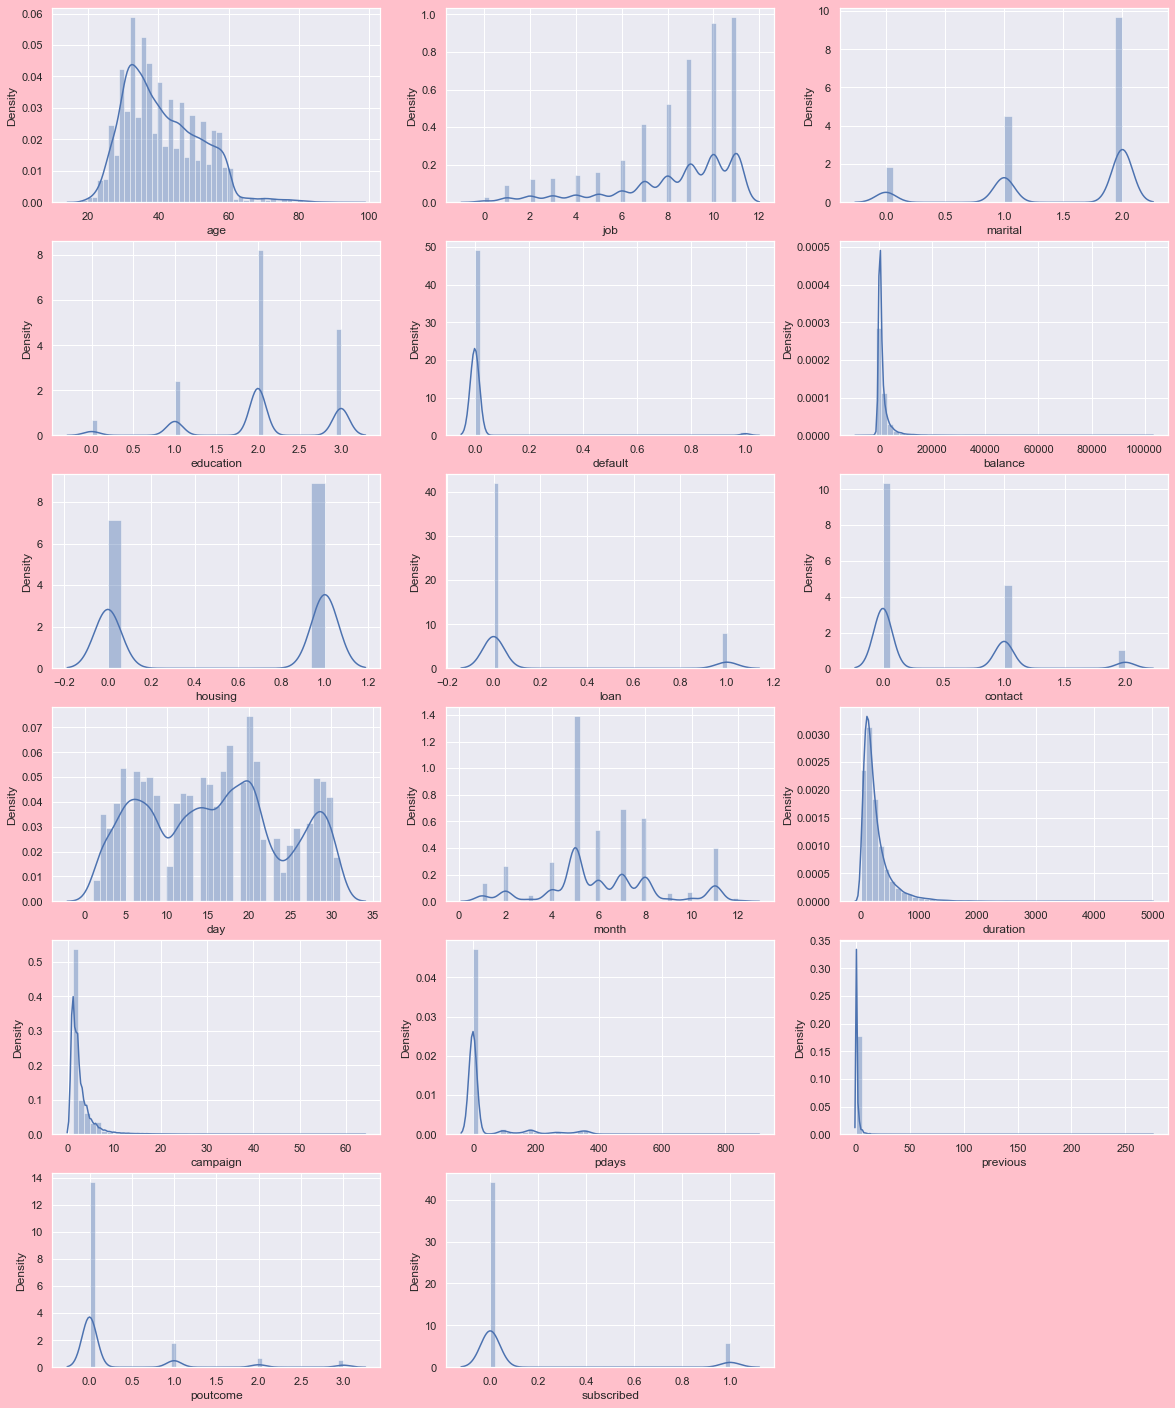

In [54]:
#lets look our data after removing outlier
plt.figure(figsize=(20,25),facecolor = 'pink')
plotnumber = 1

for column in train:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

Approx all of them are normally distributed now

<AxesSubplot:>

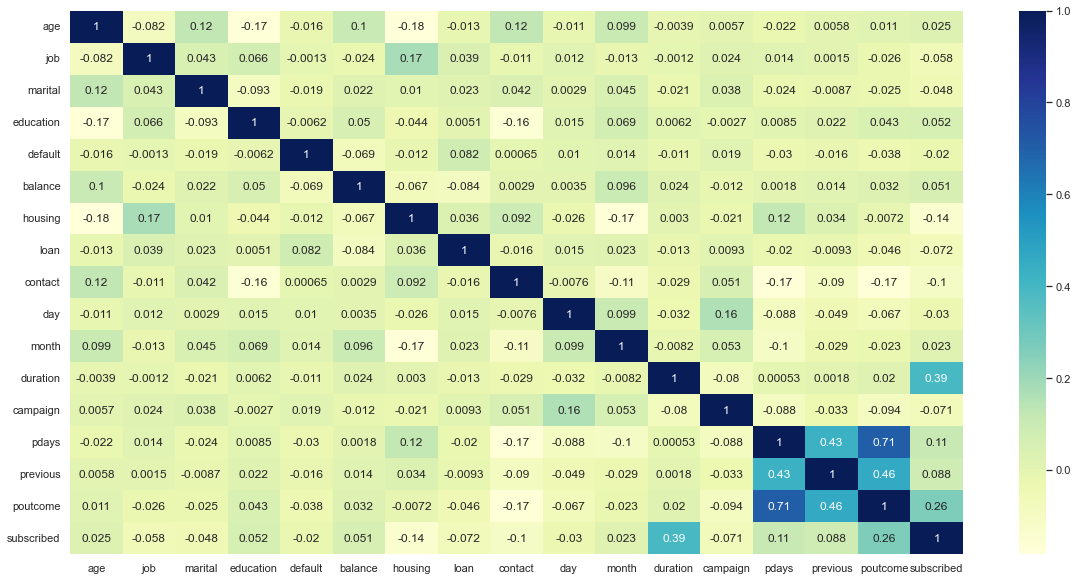

In [55]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')

In [122]:
#train.drop('pdays',axis=1,inplace=True)

In [121]:
test.drop('pdays',axis=1,inplace=True)

On the basis of above observation, we can say that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

In [57]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,8,2,0,0,1933,0,0,2,19,11,44,2,0,0,0
1,31,0,2,2,0,3,0,0,0,20,7,91,2,0,0,0
2,27,7,2,2,0,891,1,0,0,18,7,240,1,0,0,0
3,57,10,0,3,0,3287,0,0,0,22,6,867,1,3,3,1
4,31,9,2,2,0,119,1,0,0,4,2,380,1,0,0,0


# Model Building

In [58]:
# independent column

x= train.drop('subscribed', axis=1)

# target
y = train['subscribed'] #predictor variable

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
X,Y=smote.fit_resample(x,y)

In [60]:
Y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=198)

In [80]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Logistic Regression

In [68]:
# checking accuracy for
LR = LogisticRegression()
LR.fit(X_train,Y_train)
predLR = LR.predict(X_test)
print('Acurracy score is- ',accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))
score = cross_val_score(LR,X,Y)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(Y_test,predLR)-score.mean())

Acurracy score is-  0.7995226730310262
[[6821 1491]
 [1869 6579]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      8312
           1       0.82      0.78      0.80      8448

    accuracy                           0.80     16760
   macro avg       0.80      0.80      0.80     16760
weighted avg       0.80      0.80      0.80     16760

cross vallidation sccore is -  [0.7819744  0.79629464 0.79745816 0.80076971 0.79475474]
CV mean score is -  0.7942503312403831
Difference between Accracy score and cross validation mean score is -  0.005272341790643065


# RandomForestClassifier

In [66]:
# checking accuracy for RandomForestclasifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
predRFC = RFC.predict(X_test)
print('Acurracy score is- ',accuracy_score(Y_test,predRFC))
print(confusion_matrix(Y_test,predRFC))
print(classification_report(Y_test,predRFC))
score = cross_val_score(RFC,X,Y)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(Y_test,predRFC)-score.mean())

Acurracy score is-  0.9302505966587112
[[7577  735]
 [ 434 8014]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8312
           1       0.92      0.95      0.93      8448

    accuracy                           0.93     16760
   macro avg       0.93      0.93      0.93     16760
weighted avg       0.93      0.93      0.93     16760

cross vallidation sccore is -  [0.83486978 0.94424058 0.94773114 0.94647812 0.94468314]
CV mean score is -  0.9236005492372042
Difference between Accracy score and cross validation mean score is -  0.006650047421506988


# Support Vector Machine Classifier

In [72]:
# checking accuracy for
svc = SVC()
svc.fit(X_train,Y_train)
predsvc = svc.predict(X_test)
print('Acurracy score is- ',accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))
score = cross_val_score(svc,X,Y)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(Y_test,predsvc)-score.mean())

Acurracy score is-  0.7238066825775656
[[6665 1647]
 [2982 5466]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      8312
           1       0.77      0.65      0.70      8448

    accuracy                           0.72     16760
   macro avg       0.73      0.72      0.72     16760
weighted avg       0.73      0.72      0.72     16760

cross vallidation sccore is -  [0.72576748 0.72496196 0.71941287 0.7271995  0.72475832]
CV mean score is -  0.7244200261044371
Difference between Accracy score and cross validation mean score is -  -0.0006133435268714793


# Gradient Boosting Classifier

In [74]:
# checking accuracy for
GBC = GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
predGBC = GBC.predict(X_test)
print('Acurracy score is- ',accuracy_score(Y_test,predGBC))
print(confusion_matrix(Y_test,predGBC))
print(classification_report(Y_test,predGBC))
score = cross_val_score(GBC,X,Y)
print('cross vallidation sccore is - ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation mean score is - ",accuracy_score(Y_test,predGBC)-score.mean())

Acurracy score is-  0.8970763723150358
[[7267 1045]
 [ 680 7768]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      8312
           1       0.88      0.92      0.90      8448

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760

cross vallidation sccore is -  [0.81034637 0.91318357 0.91273606 0.91049852 0.90968493]
CV mean score is -  0.8912898896433653
Difference between Accracy score and cross validation mean score is -  0.005786482671670479


# AdaBoost Classifier

In [75]:
ABC = AdaBoostClassifier()
ABC.fit(X_train,Y_train)
predABC = ABC.predict(X_test)
print('Acurracy score is- ',accuracy_score(Y_test,predABC))
print(confusion_matrix(Y_test,predABC))
print(classification_report(Y_test,predABC))

score = cross_val_score(ABC,X,Y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(Y_test,predABC)-score.mean())

Acurracy score is-  0.8785799522673031
[[7202 1110]
 [ 925 7523]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8312
           1       0.87      0.89      0.88      8448

    accuracy                           0.88     16760
   macro avg       0.88      0.88      0.88     16760
weighted avg       0.88      0.88      0.88     16760

cross validation score is-  [0.77875235 0.89546228 0.89447776 0.89340374 0.89267812]
CV mean score is -  0.8709548496934374
Difference between Accracy score and cross validation score is -  0.007625102573865727


# Extra TreeClassifier

In [76]:
ET = ExtraTreesClassifier()
ET.fit(X_train,Y_train)
predET = ET.predict(X_test)
print('Acurracy score is- ',accuracy_score(Y_test,predET))
print(confusion_matrix(Y_test, predET))
print(classification_report(Y_test, predET))

score = cross_val_score(ET,X,Y)
print('cross validation score is- ',score)
print('cv mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(Y_test,predET)-score.mean())

Acurracy score is-  0.9291169451073986
[[7613  699]
 [ 489 7959]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8312
           1       0.92      0.94      0.93      8448

    accuracy                           0.93     16760
   macro avg       0.93      0.93      0.93     16760
weighted avg       0.93      0.93      0.93     16760

cross validation score is-  [0.82681464 0.94898416 0.94943167 0.94764164 0.94504117]
cv mean score is -  0.9235826553508344
Difference between Accracy score and cross validation score is -  0.005534289756564226


# DecisionTreeClassifier

In [81]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
predDT = DT.predict(X_test)
print('Acurracy score is- ',accuracy_score(Y_test,predDT))
print(confusion_matrix(Y_test,predDT))
print(classification_report(Y_test,predDT))

score = cross_val_score(DT,X,Y)
print('cross validation score is- ',score)
print('CV mean score is - ', score.mean())
print("Difference between Accracy score and cross validation score is - ",accuracy_score(Y_test,predDT)-score.mean())

Acurracy score is-  0.8932577565632458
[[7345  967]
 [ 822 7626]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8312
           1       0.89      0.90      0.90      8448

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.89      0.89      0.89     16760

cross validation score is-  [0.81285241 0.90996151 0.91381008 0.91568961 0.91049051]
CV mean score is -  0.8925608250337778
Difference between Accracy score and cross validation score is -  0.0006969315294680367


In [91]:
#The top-performing models in terms of accuracy, precision, recall, and F1-score are the random forest and Xtra tree models, with identical scores for all metrics. This suggests that these models are equally good at predicting the target variable.

#We can do hyperparameter Tuning on our best model but our accuracy is quite good

# Using ROC curve to check best fittted model

In [83]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

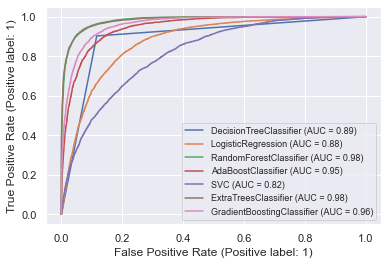

In [85]:
disp = plot_roc_curve(DT,X_test,Y_test)
plot_roc_curve(LR,X_test,Y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(RFC,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(ABC,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(ET,X_test,Y_test,ax=disp.ax_)
plot_roc_curve(GBC,X_test,Y_test,ax=disp.ax_)
plt.legend(prop = {'size':9}, loc ='lower right')

# MODEL SAVING

In [114]:
import joblib
import pickle
Census_model = 'Bank_Marketing.pickle'
pickle.dump(RFC,open(Census_model,'wb'))

In [115]:
Model = pickle.load(open('Bank_Marketing.pickle','rb'))
result = Model.score(X_test, Y_test)
print(result)

0.9302505966587112


In [123]:
# Loading the saved model
model = joblib.load('Bank_Marketing.pickle')

# Prediction
prediction = model.predict(test.values)
prediction

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [124]:
pd.DataFrame(prediction).value_counts()

0    11489
1     2075
dtype: int64